Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 07

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, June 08, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

## Useful python methods

* For Hebbian Learning
    * [list.append()](https://docs.python.org/3/tutorial/datastructures.html)
* Perceptron
    * [lambda functions](https://docs.python.org/3/reference/expressions.html#lambda)
    * [np.hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html?)
    * [np.apply_along_axis](https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html)
    * [try except](https://docs.python.org/3/tutorial/errors.html?highlight=try%20except#handling-exceptions)
    

## Assignment 0: Math recap (Hyperplanes) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *hyperplane*? What are the hyperlanes in $\mathbb{R}^2$ and $\mathbb{R}^3$? How are the usually described?

YOUR ANSWER HERE

**b)** What is the Hesse normal form? What is the intuition behind? What are its advantages?

YOUR ANSWER HERE

**c)** Can you transform the standard form of a hyperplane into the Hesse normal form and vice versa?

YOUR ANSWER HERE

## Assignment 1: Hebbian Learning (6 Points)

In the lecture (ML-07, Slides 10ff.) there is a simplified version of Ivan Pavlov's famous experiment on classical conditioning. In this exercise you will take a look into this simplified model and create your own conditionable dog with a simple Hebbian learning rule.

### a) Programming a Dog
To model the dog salivation behavior we will need to model an unconditioned and a conditioned stimulus: food and bell. They are represented as lists: `weight_food` and `weight_bell`. Note that one could just use a single number, the lists are only here to keep track of the history for a nice output. It is possible to access the current weight by selecting the last item of each list, respectively: `weight_food[-1]`.

A list of trials is already given as well as a condition database. Each entry represents an index to select from the `condition_db`. To figure out the value of the stimulus `food` in the second trial (which maps to condition `1`) one could do: `condition_db[1]["food"]`.

Your task is to implement a `for` loop over all trials. In each iteration select the correct values for $x_1$ and $x_2$ from the condition database and retrieve the current weights $w_1$ and $w_2$. Then calculate the response of the dog with the threshold $\theta$:

$$
r_t = \Theta(x_{1,t} w_{1,t-1} + x_{2,t} w_{2,t-1})\\
\Theta(x)= \begin{cases}1 \text{ if } x >= \theta\\0 \text{ else }\end{cases}
$$

With this response calculate both $w_{n,t}$ according to the Hebbian rule:

$$w_{n,t} = w_{n, t-1} + \epsilon \cdot r_t \cdot x_{n,t}$$

*Note: While you program the output might look a little messy, don't worry about it. Once you fill up all three lists properly, it will look much like on ML-07, Slide 14.*

In [1]:
# Initialization
condition_db = [{"food": 1, "bell": 0}, 
                {"food": 0, "bell": 1},
                {"food": 1, "bell": 1}]

trials = [0, 1, 2, 1, 2, 1, 2, 1]

epsilon = 0.2
theta = 1/2

responses = []
weight_food = [1]
weight_bell = [0]

update_weights = lambda weights, stimulus,response: weights.append(weights[-1]+epsilon*response*stimulus)
# TODO: For each trial, update the current weights of the US and CS and store
# the results in the respective lists. Also store the response.
for trial in trials:
    weight_f = weight_food[-1]
    weight_b = weight_bell[-1]
    stimulus_f = condition_db[trial]["food"]
    stimulus_b = condition_db[trial]["bell"]
    response = 1 if(stimulus_f*weight_f + stimulus_b * weight_b >= theta) else 0
    update_weights(weight_food,stimulus_f,response)
    update_weights(weight_bell,stimulus_b,response)
    responses.append(response)


# Output
print("| Food   |   |" + "|   |".join(["{:3d}".format(condition_db[trial]["food"]) for trial in trials]) + "|   |")
print("| Bell   |   |" + "|   |".join(["{:3d}".format(condition_db[trial]["bell"]) for trial in trials]) + "|   |")
print("| Saliva |   |" + "|   |".join(["{:3d}".format(response) for response in responses]) + "|   |")
print("| w_Food |" + "|   |".join(["{:3.1f}".format(w) for w in weight_food]) + "|")
print("| w_Bell |" + "|   |".join(["{:3.1f}".format(w) for w in weight_bell]) + "|")

| Food   |   |  1|   |  0|   |  1|   |  0|   |  1|   |  0|   |  1|   |  0|   |
| Bell   |   |  0|   |  1|   |  1|   |  1|   |  1|   |  1|   |  1|   |  1|   |
| Saliva |   |  1|   |  0|   |  1|   |  0|   |  1|   |  0|   |  1|   |  1|   |
| w_Food |1.0|   |1.2|   |1.2|   |1.4|   |1.4|   |1.6|   |1.6|   |1.8|   |1.8|
| w_Bell |0.0|   |0.0|   |0.0|   |0.2|   |0.2|   |0.4|   |0.4|   |0.6|   |0.8|


### b) Parameter adjustment

In the above default setting of trials (`[0, 1, 2, 1, 2, 1, 2, 1]`, in case you changed it), how many learning steps, i.e. simultaneous presentation of unconditioned and conditioned stimulus, did you need until the dog started to produce saliva on the conditioned stimulus? What happens if you change the parameters $\epsilon$ and $\theta$? Try smaller and bigger values for each or present different conditions to the dog.

The dog needed two simultaneous presentations of the unconditioned an conditoned stilmulus to infer a correlation. If we increase the theta we thereby increase the threshold of the function (think activation threshold of a neuron) the dog is more hesitant to learn thus the given trials are not sufficient for the dog to learn therefore the dog needs more simultaneous presentations. If we increase the epsilon however we increase the amount of which the weight are updated thus the dog is far more biased for learning new information. For an epsilon of 0.5 one simultanous presentation is already enough for the dog to infer correlation.

## Assignment 2: The Logic Perceptron [3 Points]

### a) The Logic Perceptron

For the following two logical functions sketch the weights of a perceptron after it was trained. To do so, figure out when the perceptron should fire. Then come up with ideas of how you can achieve this. Remember that $w_0$, the bias, is used as a threshold and that there is a constant $x_0 = 1$. Provide the values for $w_0,w_1,w_2$ as well as some explanation.

#### 1) $(A \wedge B) \vee (\neg A \wedge B)$

The truth value from a is not important for firing the neuron therefore it should receive a weight of 0. As there is only left input left for making the decision the bias is also irrellevant as long as it is non negative. Meaning that b should receive a weight of larger than 0. (0,0,1)

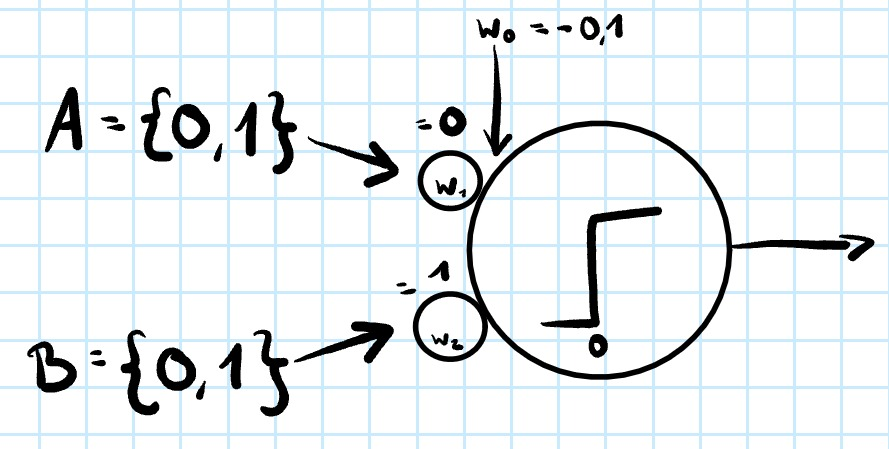

#### 2) $(A \wedge B) \vee (\neg A \wedge B) \vee (A \wedge \neg B)$

This should only fire when both A and B are true therefore both of their weight should be 1 and the weight again should be non negative meaning (0,1,1) is sufficient)

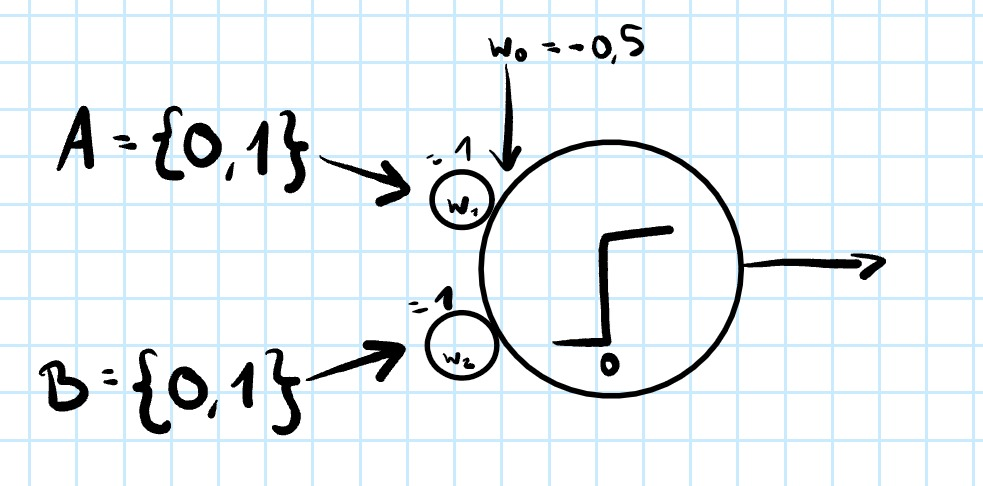

## Assignment 3: Perceptron [7 Points]

In this exercise you will implement a simple perceptron as described in the lecture [ML-07 Slide 31]. As with  previous exercises it is possible to not use our premade code blocks but write the single Perceptron completely from scratch (an empty cell to do so can be found [below](#Own-Implementation)). 

Use the following output function:
$$y = \begin{cases}1 \quad \text{if} \ s \ge 0\\0 \quad \text{else}\end{cases}$$

The `TODO`'s in the following code segments guide you through what has to be done.

*Hint*: If you have problems with `np.arrays` (which usually have shapes like `(13,)`, thus with one degenerate dimension, either set the shapes manually (`my_np_array.shape = (13, 1)`). Other useful functions might be `np.append` or `np.hstack`.

In [1]:
import numpy as np
import numpy.random as rnd

# TODO: Write the input activation (called net_input) and the output function (called out_fun).
# YOUR CODE HERE

# D = {x1, x2 ,x3, ...,xn} , Xi belond to (R)^d. simplify notation with w = {w0, w1, w2,…, wd}T   so  w.T @ D

net_input = lambda w,d : w.T @ d  

# determines the output of the neuron (1 if s > 0 else 0)
# if activation s>=0 , then 1, else 0  

out_fun = lambda s : 1 if (s >= 0) else 0 



# TODO: Write a function generate_weights that generates N (= number of dimensions) + 1 (w_0) random weights.
# YOUR CODE HERE

# np.random.rand generates a random value in a given shape. 

generate_weights = lambda dims : rnd.rand(dims +1)

In [2]:
####################################################
## Testing the perceptron with a concrete example ##
####################################################

# Dimensions for our test.
dims = 12

# Input is a row vector. (Shape is (1, 13).)
D = np.hstack((1, rnd.rand(dims) - 0.5))

# Weights are stored in a vector.
W = generate_weights(dims)

out = out_fun(net_input(D, W))

assert out == 1 or out == 0, "The output has to be either 1 or 0, but was {}".format(out)

The following `eval_network(t, D, W)` function is used to measure the performance of your perceptron for the upcoming task.

In [3]:
def eval_network(t, D, W):
    """
    This function takes the trained weights of a perceptron
    and the input data (D) as well as the correct target values (t)
    and computes the overall error rate of the perceptron.
    """
    error = 0.0
    size = max(D.shape)
    for i in range(size):
        out = out_fun(net_input(D[i], W))
        error = error + abs(t[i] - out)
    # Normalize the error.
    try:
        return error.item(0) / size
    except AttributeError:
        return error / size

Now we will use the above defined functions to train the perceptron to one of the following logical functions: OR, NAND or NOR. 

In [4]:
# Plotting functions
import matplotlib.pyplot as plt

def function_to_learn(selector, function):
    """
    Functional definitions for the perceptron to learn
    Instantiates plots for visualization of the decision boundary
    :param selector: selects which function to activate
    :return function:
    """
    plot_points = [[0,0],[0,1],[1,0],[1,1]]
    plot_colors = []

    for point in plot_points:
        plot_colors.append(function(point[0], point[1]))
    for color, point in enumerate(plot_points):
        plt.scatter(*point, s=50, c='b' if plot_colors[color] == 1 else 'r')
    print("Perceptron will now learn '{}'...\n\n".format(selector))

Perceptron will now learn 'xor'...




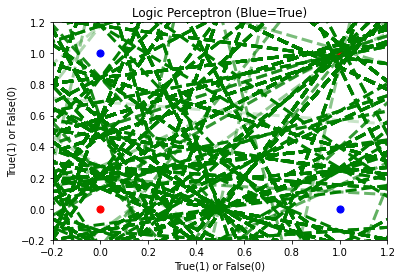

Overall error of the Perceptron: 46.67%


In [5]:
import matplotlib.pyplot as plt

# Change this line to choose other operators:
# op = 'and'
# op = 'or'
op = 'xor'
# op = 'nand'
# op = 'nor'


###################################################
## Now we train our perceptron! [ML-07 Slide 33] ##
###################################################

# TODO: Write the update function (name it 'delta_fun')
#       for the weights dependent on epsilon, the target,
#       the output and the input vector.
# YOUR CODE HERE

# eps = theta = ε = step size,    t = target,   y = output,    x = data/input ,   
# perception tranitng Rule:    ∆w = ε (t – y) x

delta_fun = lambda eps, t, y, x : eps * (t - y) * x

# TODO: Define suitable parameters for your problem.
# Use the following names:
#   ϵ: learning rate
#   dims: dimensions
#   training_size: the number of training samples

# YOUR CODE HERE
eps = ϵ = 0.5
dims = 4
training_size = 1500

# TODO: Generate the weights (in a variable called W).
# YOUR CODE HERE

W = generate_weights(dims)

# TODO: Generate a matrix D of truthvalue pairs.
# The shape should be (training_size, dims).
# YOUR CODE HERE

# creating random value matrix of given shape (1500 x 4),  creates a uniform distribution between 0 and 1. 
# checking with > 0.5 for ceating a boolean masking of true or false. 

D = rnd.rand(training_size, dims) > 0.5

# TODO: Pad the input D with ones for the bias. The bias should always be
# w_0, i. e. the first column of the data should be ones.
# YOUR CODE HERE

# np.hstack((X,Y)) = Stack arrays in sequence horizontally (column wise). expects tuple
#np.ones = creates a array with only 1 in given shape <-- tuple
# X = [1,x1,x2,x3,...,xn]

pad = np.ones((training_size, 1))
D = np.hstack((pad, D))



# Learn one of the logical functions OR, NAND, NOR
# (the lambda keyword is just a short way to define functions).
log_operators = {
    'and': lambda x1, x2: x1 and x2,
    'or': lambda x1, x2: x1 or x2,
    'nand': lambda x1, x2: not (x1 and x2),
    'nor': lambda x1, x2: not (x1 or x2),
    'xor': lambda x1, x2: (x1 and not x2) or (not x1 and x2)
}

log_operator = log_operators[op]
function_to_learn(op, log_operator)

row_operator = lambda row: log_operator(row[0], row[1])
labels = np.apply_along_axis(row_operator, 1, D[:, 1:])

epochs = 2100    # Extra question: What effects do changes in the epochs 
samp_size = 5  #                 and sample sizes have on our training?

for i in range(epochs):
    # Sample random from the training data.
    for idx in rnd.choice(range(training_size), samp_size, replace=False):
        y = out_fun(net_input(D[idx], W))
        W += delta_fun(ϵ, labels[idx], y, D[idx])
    # Plotting code    
    y_point = (0, (-W[0] / W[2]))
    x_point = ((-W[0] / W[1]), 0)
    try:
        slope = (y_point[1] - x_point[1]) / (y_point[0] - x_point[0]) # will not work if x and y intercepts are 0
    except ZeroDivisionError:
        print("X and Y intercepts are both zero.  Due to the way slope is calculated, this causes a division by zero.  Sorry.")
    y_out = lambda points: slope * points
    x = np.linspace(-10, 10, 100)
    plt.plot(x, y_out(x) + y_point[1], 'g--', linewidth=3, alpha=i/epochs +.2 if i/epochs +.2 < 1 else 1)
    
plt.ylim([-.2, 1.2])
plt.xlim([-.2, 1.2])
plt.title("Logic Perceptron (Blue=True)")
plt.xlabel("True(1) or False(0)")
plt.ylabel("True(1) or False(0)")
plt.show()

# Print the overall performance of the Perceptron.
print("Overall error of the Perceptron: {:.2%}".format(eval_network(labels, D, W)))

### Own Implementation

Skip this if you already implemented the perceptron above.

In [ ]:
# Space for complete own implementation

# YOUR CODE HERE

## Assignment 4: Sigmoid Activation & Backpropagation Delta Functions [6 Points]

In this exercise we are first going to take the derivative of a famous activation function - the sigmoid function:

$$\sigma(t)=\frac{1}{1+e^{-t}}$$

This function is commonly used because of its nice analytical properties: Its image is the interval $(0,1)$, it is non-linear, strictly monotonous, continuous, differentiable and the derivative can be expressed in terms of the original function at the given point. This allows us to avoid redundant calculations. The sigmoid function is a special case of the more general *Logistic function* which can be found in many different fields: Biology, chemistry, economics, demography and recently most prominently: artificial neural networks.

Computing the derivative of the sigmoid activation function:

Proof that

$$
\frac{\partial \sigma}{\partial t} = \frac{1}{\left({1 + \e^{-t}}\right)} \cdot \frac{\e^{-t}}{\left({1 + \e^{-t}}\right)}
$$

and that it can be rewritten as an expression in terms of $\sigma(t)$ resulting in:

$$
\frac{\partial \sigma}{\partial t} = \sigma(t) \left(1 - \sigma(t) \right)
$$

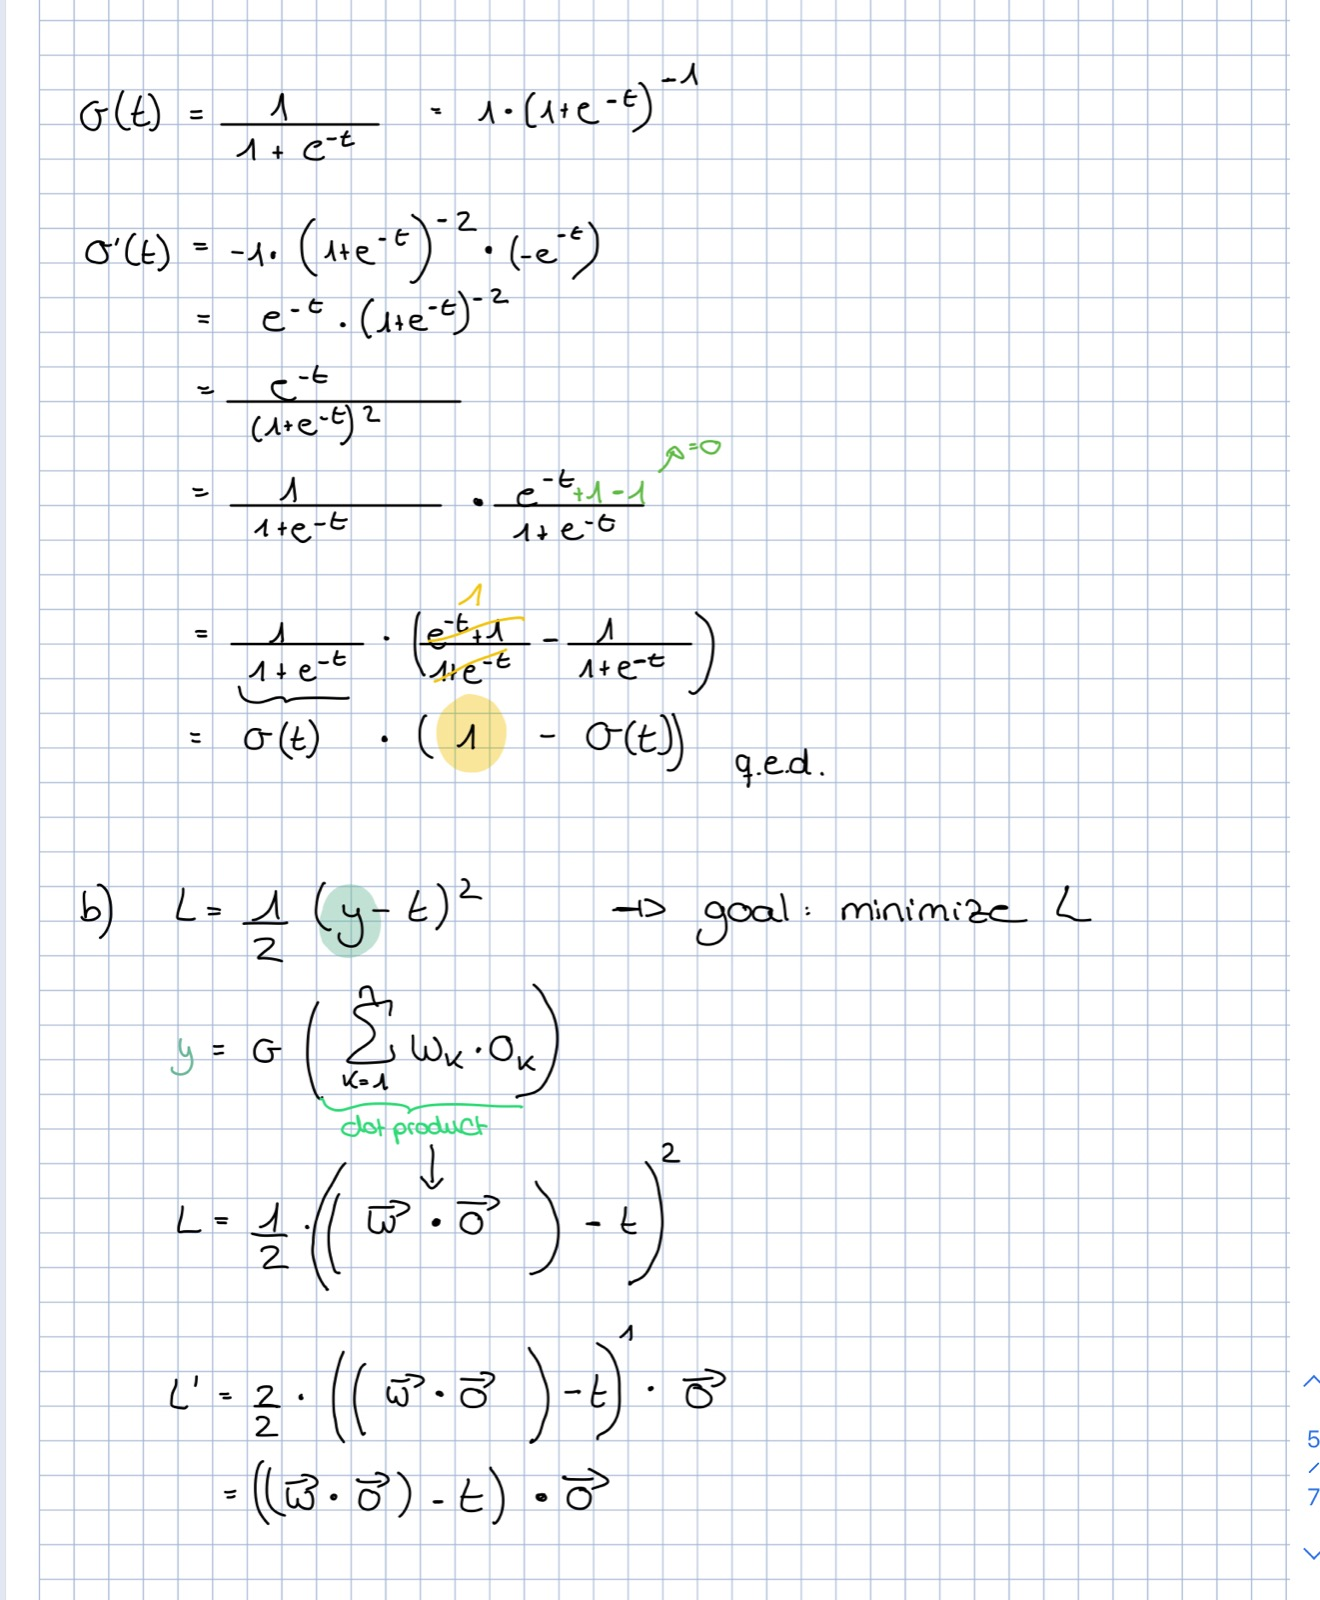

Multilayer perceptrons (MLPs) can be regarded as a simple concatenation (and parallelization) of several perceptrons, each having a specified activation function $\sigma$ and a set of weights $\mathbf{w}_{ij}$. The idea that this can be done was discovered early after the invention of the perceptron, but people didn't really use it in practice because nobody really knew how to figure out the appropriate $\mathbf{w}_{ij}$. The solution to this problem was the discovery of the backpropagation algorithm which consists of two steps: first propagating the input forward through the layers of the MLP and storing the intermediate results and then propagating the error backwards and adjusting the weights of the units accordingly.

An updating rule for the output layer can be derived straightforward. The rules for the intermediate layers can be derived very similarly and only require a slight shift in perspective - the mathematics for that are however not in the standard toolkit so we are going to omit the calculations and refer you to the lecture slides.

We take the least-squares approach to derive the updating rule, i.e. we want to minimize the Loss function
$$L = \frac{1}{2}(y-t)^2$$
where t is the given (true) label from the dataset and y is the (single) output produced by the MLP. To find the weights that minimize this expression we want to take the derivative of $L$ w.r.t. $\mathbf{w}_{i}$ where we are now going to assume that the $\mathbf{w}_{i}$ are the ones directly before the output layer:
$$y = \sigma\left(\sum_{k=1}^n \mathbf{w}_{k}o_k\right)$$
Calculate $\frac{\partial L}{\partial \mathbf{w}_{i}}$.

*Hint*: Start here if you don't know what to do: $\frac{\partial L}{\partial \mathbf{w}_{i}} = \frac{\partial L}{\partial y}\frac{\partial y}{\partial \mathbf{w}_{i}}$

YOUR ANSWER HERE